In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("broadway_lion_king_data.csv")

In [16]:
# Starting EDA
print(data.shape)

(1391, 6)


In [17]:
list(data.columns)


['Week Endings',
 'Avg Ticket Price ($)',
 'Top Ticket Price ($)',
 'Seats Sold',
 'Seats in Theatre',
 '% Cap']

In [18]:
print(data.to_string())


      Week Endings Avg Ticket Price ($) Top Ticket Price ($)  Seats Sold  Seats in Theatre    % Cap
0     Jan 18, 2026              $129.26              $279.00     12906.0              1696   95.12%
1     Jan 11, 2026              $132.10              $259.00     12928.0              1696   95.28%
2      Jan 4, 2026              $234.09              $399.00     13439.0              1696   99.05%
3     Dec 28, 2025              $265.28              $375.00     14760.0              1696   96.70%
4     Dec 21, 2025              $208.19              $339.00     13229.0              1696   97.50%
5     Dec 14, 2025              $180.15              $315.00     13161.0              1696   97.00%
6      Dec 7, 2025              $181.74              $325.00     13262.0              1696   97.74%
7     Nov 30, 2025              $208.04              $339.00     13397.0              1696   98.74%
8     Nov 23, 2025              $152.44              $307.00     12954.0              1696   95.47%


In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Week Endings          1391 non-null   object 
 1   Avg Ticket Price ($)  1391 non-null   object 
 2   Top Ticket Price ($)  1366 non-null   object 
 3   Seats Sold            1389 non-null   float64
 4   Seats in Theatre      1391 non-null   int64  
 5   % Cap                 1391 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 65.3+ KB


In [20]:
for col in data.columns:
    print(data[col].value_counts())

Week Endings
Jan 18, 2026    1
Oct 8, 2006     1
Aug 13, 2006    1
Aug 20, 2006    1
Aug 27, 2006    1
               ..
Aug 23, 2015    1
Aug 30, 2015    1
Sep 6, 2015     1
Sep 13, 2015    1
Oct 19, 1997    1
Name: count, Length: 1391, dtype: int64
Avg Ticket Price ($)
$151.94    3
$77.20     3
$78.04     3
$144.94    3
$57.14     3
          ..
$127.36    1
$132.04    1
$129.59    1
$139.46    1
$58.12     1
Name: count, Length: 1289, dtype: int64
Top Ticket Price ($)
$225.00    230
$197.50    207
$250.00    181
$100.00    143
$90.00     107
$199.00     93
$251.25     79
$80.00      60
$240.00     54
$75.00      53
$200.00     28
$277.00     24
$237.00     12
$227.00     10
$249.00      9
$215.00      8
$259.00      7
$299.00      4
$279.00      4
$239.00      4
$339.00      4
$325.00      4
$85.00       3
$297.00      3
$232.00      2
$209.00      2
$426.00      2
$275.00      2
$95.00       2
$477.00      2
$347.00      2
$229.00      2
$0.00        1
$262.00      1
$307.00      1

**Preliminary Analysis**

The dataset comprises 1391 weekly records and six columns capturing various aspects of Broadway ticket sales and theatre occupancy. Each record corresponds to ticketing and attendance data for a specific week. Among the columns, Seats in Theatre may appear potentially redundant, as both Seats Sold and Percentage Capacity are already provided. However, since this column serves as a base measure for occupancy calculations and may be useful for validation or future analysis, it has been retained and not removed at this stage.

average ticket price, top ticket price, seats sold, seats in theatre, and percentage capacity, are currently stored as string values and require conversion to numeric formats for analysis. The Week Endings column should be converted to datetime format to enable time-series analysis.

A small number of top ticket price entries were recorded as $0.00, which represent invalid pricing data.

Additionally, a small number of number of seats in theatre was recorded as zero.




In [21]:
for col in data.columns:
    print(data[col].value_counts(dropna = False))
    print(data[col].value_counts(dropna = False).get(np.nan, 0))
    print(data[col].value_counts(dropna = False).get('', 0))

Week Endings
Jan 18, 2026    1
Oct 8, 2006     1
Aug 13, 2006    1
Aug 20, 2006    1
Aug 27, 2006    1
               ..
Aug 23, 2015    1
Aug 30, 2015    1
Sep 6, 2015     1
Sep 13, 2015    1
Oct 19, 1997    1
Name: count, Length: 1391, dtype: int64
0
0
Avg Ticket Price ($)
$151.94    3
$77.20     3
$78.04     3
$144.94    3
$57.14     3
          ..
$127.36    1
$132.04    1
$129.59    1
$139.46    1
$58.12     1
Name: count, Length: 1289, dtype: int64
0
0
Top Ticket Price ($)
$225.00    230
$197.50    207
$250.00    181
$100.00    143
$90.00     107
$199.00     93
$251.25     79
$80.00      60
$240.00     54
$75.00      53
$200.00     28
NaN         25
$277.00     24
$237.00     12
$227.00     10
$249.00      9
$215.00      8
$259.00      7
$299.00      4
$279.00      4
$239.00      4
$339.00      4
$325.00      4
$297.00      3
$85.00       3
$232.00      2
$426.00      2
$275.00      2
$95.00       2
$477.00      2
$209.00      2
$347.00      2
$229.00      2
$0.00        1
$262.0

**Additional Insight:**
Most null values are in the top ticket prices column only. However, from the above output, some records are seen to have 0 'seats in theatre' for some weeks, the records for these weeks will be checked to see if the data is corrupted or the seats were actually 0 then. Broadway might have also been closed during those weeks. Chore: To check the same value_counts output once after transformation and sorting by values

In [22]:
# Data Transformation start
data['Week Endings'] = pd.to_datetime(
    data['Week Endings'],
    format="%b %d, %Y",
    errors='raise'
)
print(data['Week Endings'])


0      2026-01-18
1      2026-01-11
2      2026-01-04
3      2025-12-28
4      2025-12-21
          ...    
1386   1997-11-16
1387   1997-11-09
1388   1997-11-02
1389   1997-10-26
1390   1997-10-19
Name: Week Endings, Length: 1391, dtype: datetime64[ns]


In [23]:
data['Avg Ticket Price ($)'] = data['Avg Ticket Price ($)'].apply(lambda x: float(x[1:]))
print(data['Avg Ticket Price ($)'])

0       129.26
1       132.10
2       234.09
3       265.28
4       208.19
         ...  
1386     56.52
1387     56.42
1388     56.75
1389     58.12
1390     59.26
Name: Avg Ticket Price ($), Length: 1391, dtype: float64


In the Top Ticket Price column, data transformation similar to the Avg Ticket Price column failed because missing values are stored as NaN, which pandas treats as a float.
Since floats are not subscriptable, attempting string slicing (x[1:]) caused an error.

Will look into how to ignore such values when doing data conversion

I want to deal with these values numerically, maybe replacing them with mean or mode, or the mean of the values of 5 weeks before and after it.

In [24]:
# Using .map() method to do data transformation for 'Top Ticket Price ($)' column since it allows an additional argument
# na_action to ignore NaN values as they are encountered
data['Top Ticket Price ($)'] = data['Top Ticket Price ($)'].map(lambda x: float(x[1:]), na_action = 'ignore')
print(data['Top Ticket Price ($)'])

0       279.0
1       259.0
2       399.0
3       375.0
4       339.0
        ...  
1386     75.0
1387     75.0
1388     75.0
1389     75.0
1390     75.0
Name: Top Ticket Price ($), Length: 1391, dtype: float64


In [25]:
data['Seats Sold'] = data['Seats Sold'].fillna(0).astype(int)
print(data['Seats in Theatre'])


0       1696
1       1696
2       1696
3       1696
4       1696
        ... 
1386    1745
1387    1745
1388    1745
1389    1745
1390    1745
Name: Seats in Theatre, Length: 1391, dtype: int64


In [38]:
data['% Cap'] = (
    data['% Cap']
    .astype(str)              # defensive: handles mixed types
    .str.replace('%', '', regex=False)
    .astype(float)
)


In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, 0 to 1390
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Week Endings          1389 non-null   datetime64[ns]
 1   Avg Ticket Price ($)  1389 non-null   float64       
 2   Top Ticket Price ($)  1389 non-null   float64       
 3   Seats Sold            1389 non-null   int64         
 4   Seats in Theatre      1389 non-null   int64         
 5   % Cap                 1389 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 76.0 KB
None


In [40]:
sorted_df = data.sort_values(by='Week Endings', ascending=False)
print(sorted_df[sorted_df['Seats in Theatre'] == 0])


Empty DataFrame
Columns: [Week Endings, Avg Ticket Price ($), Top Ticket Price ($), Seats Sold, Seats in Theatre, % Cap]
Index: []


The above code output shows the dates at which the seats in theatre for broadway lion king were '0.' Chore: further research to be done on the above to identify the reason for the same. Current hypothesis: data corruption/Broadway closed/External factors for the unaivalibility of seats

### Added:
Important: The dates at the above 2 data points were researched on, and it was found that all broadway shows had been ceased from Nov 18 - Nov 25 2007 due to the "2007 Broadway stagehand strike." Thus, we can conclude that the data was not corrupted and will drop these two points, since this data is of no insight. Datapoints 865, 866 dropped due to external factors affecting Broadway.

In [41]:
data = data[~data['Week Endings'].isin(pd.to_datetime([
    '2007-11-18',
    '2007-11-25'
]))]

print(data.shape)


(1389, 6)


In [42]:
# Confirming if data has been dropped accurately
print(data[data['Seats in Theatre'] == 0].shape)

(0, 6)


In [43]:
dates = data['Week Endings']
grouped_df = data.groupby(by=dates.dt.year)
mean_series = grouped_df['Top Ticket Price ($)'].mean()
print(mean_series)

Week Endings
1997     75.000000
1998     75.961538
1999     80.490196
2000     89.622642
2001     90.000000
2002    101.538462
2003    240.000000
2004    102.692308
2005    109.615385
2006    227.884615
2007    251.050000
2008    250.841346
2009    250.000000
2010    250.000000
2011    218.701923
2012    197.500000
2013    197.500000
2014    193.701923
2015    214.423077
2016    225.000000
2017    225.000000
2018    225.000000
2019    250.076923
2020    245.700000
2021    199.000000
2022    199.000000
2023    206.547170
2024    268.076923
2025    269.250000
2026    312.333333
Name: Top Ticket Price ($), dtype: float64


In [44]:
# Setting the top ticket price for year 2021:
# This will be done manually bcuz there exists no mean for the year 2021, all values are NaN

# Setting the boolean mask first only, as we will be reusing it
boolean_mask = np.isnan(data['Top Ticket Price ($)']) & (data['Week Endings'].dt.year == 2021)
# Checking before assigning mean value:
print(data['Top Ticket Price ($)'][boolean_mask].head(3))
# Assigning mean value:
data.loc[boolean_mask, 'Top Ticket Price ($)'] = 199.0
# After data cleaning:
data['Top Ticket Price ($)'][boolean_mask].head(3)

Series([], Name: Top Ticket Price ($), dtype: float64)


Series([], Name: Top Ticket Price ($), dtype: float64)

In [45]:
data.groupby(data['Week Endings'].dt.year)['Top Ticket Price ($)'].apply(lambda x: x.isna().sum())


Week Endings
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
Name: Top Ticket Price ($), dtype: int64

Ignore 2021 (no NaNs there)

Fill the 11 NaNs in 2022

Leave all other years untouched

In [46]:
def set_top_t_price_to_mean(weekdata):
    mask = weekdata['Top Ticket Price ($)'].isna()
    years = weekdata.loc[mask, 'Week Endings'].dt.year
    weekdata.loc[mask, 'Top Ticket Price ($)'] = years.map(mean_series)
    return weekdata


NaN values in Top Ticket Price were handled in two stages:
1. 2021 values were filled manually due to the absence of a yearly mean.
2. Remaining missing values (2022) were filled using year-wise means.

After these steps, no missing values remain in the column.


In [47]:
data = set_top_t_price_to_mean(data)


In [48]:
print(data[np.isnan(data['Top Ticket Price ($)'])])

Empty DataFrame
Columns: [Week Endings, Avg Ticket Price ($), Top Ticket Price ($), Seats Sold, Seats in Theatre, % Cap]
Index: []


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, 0 to 1390
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Week Endings          1389 non-null   datetime64[ns]
 1   Avg Ticket Price ($)  1389 non-null   float64       
 2   Top Ticket Price ($)  1389 non-null   float64       
 3   Seats Sold            1389 non-null   int64         
 4   Seats in Theatre      1389 non-null   int64         
 5   % Cap                 1389 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 76.0 KB


In [50]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Week Endings,1389,2011-06-02 19:52:13.477321984,1997-10-19 00:00:00,2004-06-20 00:00:00,2011-03-13 00:00:00,2017-11-12 00:00:00,2026-01-18 00:00:00,NaN
Avg Ticket Price ($),1389.0,115.313348,56.08,78.35,114.16,146.6,286.61,40.313919
Top Ticket Price ($),1389.0,192.338913,0.0,100.0,200.0,240.0,599.0,68.715539
Seats Sold,1389.0,13419.201584,5737.0,13049.0,13438.0,14207.0,16319.0,1032.378259
Seats in Theatre,1389.0,1715.264939,1598.0,1677.0,1696.0,1754.0,1801.0,52.954527
% Cap,1389.0,97.632138,53.33,96.51,99.45,100.06,103.46,4.824104


<Axes: xlabel='Avg Ticket Price ($)', ylabel='Density'>

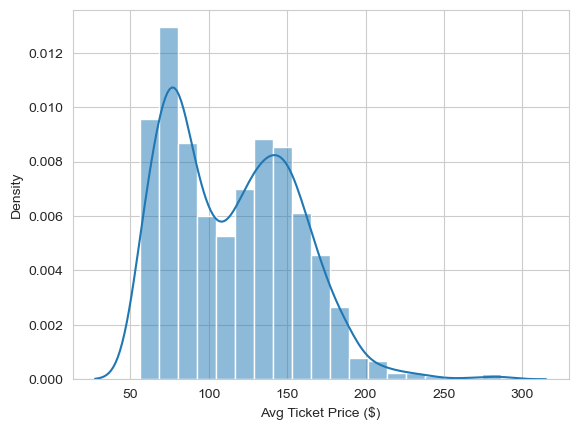

In [51]:
sns.set_style("whitegrid")
sns.histplot(data, x='Avg Ticket Price ($)', stat='density', kde=True, kde_kws=dict(cut=3))

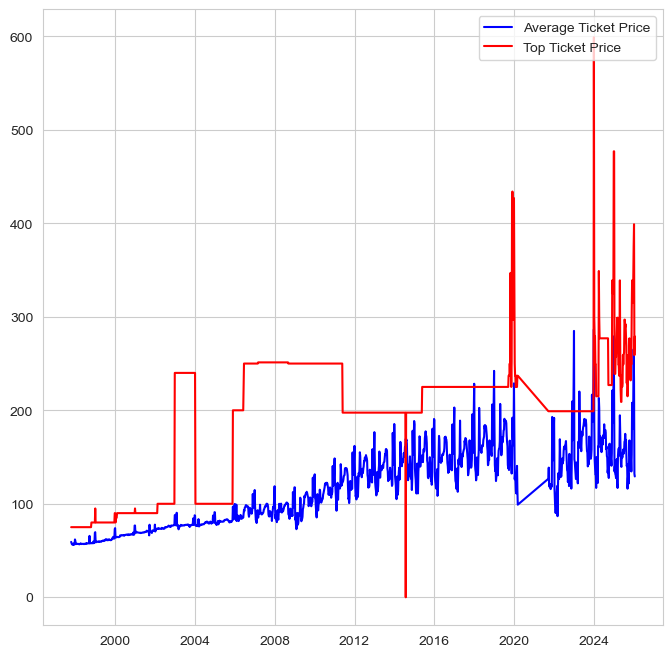

In [52]:
# Some basic plotting to check data scale to determine whether data needs to be normalised or not
# before being used with the sequence model for prediction
time = data['Week Endings']
plt.figure(figsize=(8, 8))
plt.grid(True)
plt.plot(time, data['Avg Ticket Price ($)'], color='b', label="Average Ticket Price")
plt.plot(time, data['Top Ticket Price ($)'], color='r', label="Top Ticket Price")
plt.legend(loc=1)
plt.show()